In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200) # not sure we need this yet but can un-comment then run if it's useful later -CS

In [ ]:
#Import Lasio package for well data processing 
!pip install lasio
import lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.1 MB/s 


In [ ]:
# import data using pandas
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive')
BIR3 = lasio.read('gdrive/My Drive/Raw Data/BIR-3.las') #this only works if you go to the shared directory and click "Add shortcut to Drive"
AMR1 = lasio.read('gdrive/My Drive/Raw Data/AMR-1.las') #this only works if you go to the shared directory and click "Add shortcut to Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Display the imported CSV file as a dataframe 
df = AMR1.df()
df

,NEU,NEUT,DENS,DEN,DTC_AVG2,GR,PORNET_NOV14,CALI,CAL,RESD,RES_DEP,VCL_2014
DEPT,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2972.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Describe basic statistics for each defined column 
df.describe()

,NEU,NEUT,DENS,DEN,DTC_AVG2,GR,PORNET_NOV14,CALI,CAL,RESD,RES_DEP,VCL_2014
count,589.000000,589.000000,5373.000000,5373.000000,5351.000000,5916.000000,199.000000,5361.000000,5361.000000,5373.000000,5373.000000,198.000000
mean,0.031269,0.031269,2.213969,2.213969,93.616430,24.773589,0.128855,13.692650,13.692650,493.505384,493.505384,0.258533
std,0.009421,0.009421,0.248519,0.248519,35.664514,21.548501,0.032674,4.226005,4.226005,665.866362,665.866362,0.193300
min,-0.006899,-0.006899,1.657153,1.657153,48.408173,5.293586,0.050591,6.318424,6.318424,0.275347,0.275347,0.037302
25%,0.029759,0.029759,2.078268,2.078268,68.237492,10.515123,0.108772,10.191538,10.191538,0.679849,0.679849,0.128947
50%,0.032978,0.032978,2.122972,2.122972,76.864220,14.278049,0.128033,11.331650,11.331650,2.489374,2.489374,0.175207
75%,0.036152,0.036152,2.435211,2.435211,104.499363,36.792068,0.146911,17.922043,17.922043,1356.491821,1356.491821,0.301402
max,0.081977,0.081977,2.988067,2.988067,199.278000,152.391937,0.214609,20.103001,20.103001,2110.183350,2110.183350,0.790680


In [ ]:
# shape of loaded df
df.shape 

(5949, 12)

In [ ]:
df.columns

Index(['NEU', 'NEUT', 'DENS', 'DEN', 'DTC_AVG2', 'GR', 'PORNET_NOV14', 'CALI',
       'CAL', 'RESD', 'RES_DEP', 'VCL_2014'],
      dtype='object')

In [ ]:
df.dtypes

NEU             float64
NEUT            float64
DENS            float64
DEN             float64
DTC_AVG2        float64
GR              float64
PORNET_NOV14    float64
CALI            float64
CAL             float64
RESD            float64
RES_DEP         float64
VCL_2014        float64
dtype: object

In [ ]:
# gives an idea of where all the NaNs are VCL_2014 is missing from almost the entire dataset
df.isna().sum()

NEU             5360
NEUT            5360
DENS             576
DEN              576
DTC_AVG2         598
GR                33
PORNET_NOV14    5750
CALI             588
CAL              588
RESD             576
RES_DEP          576
VCL_2014        5751
dtype: int64

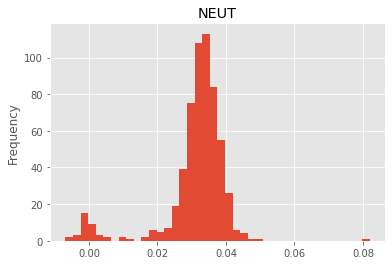

In [ ]:
df['NEUT'].plot(kind='hist', bins=40, title='NEUT')

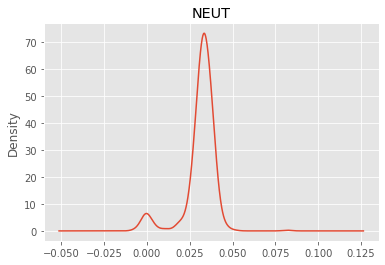

In [ ]:
df['NEUT'].plot(kind='kde', title='NEUT')

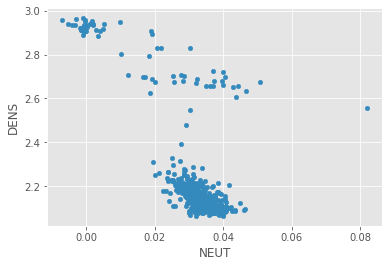

In [ ]:
df.plot(kind='scatter', y= 'DENS', x= 'NEUT')
plt.show()

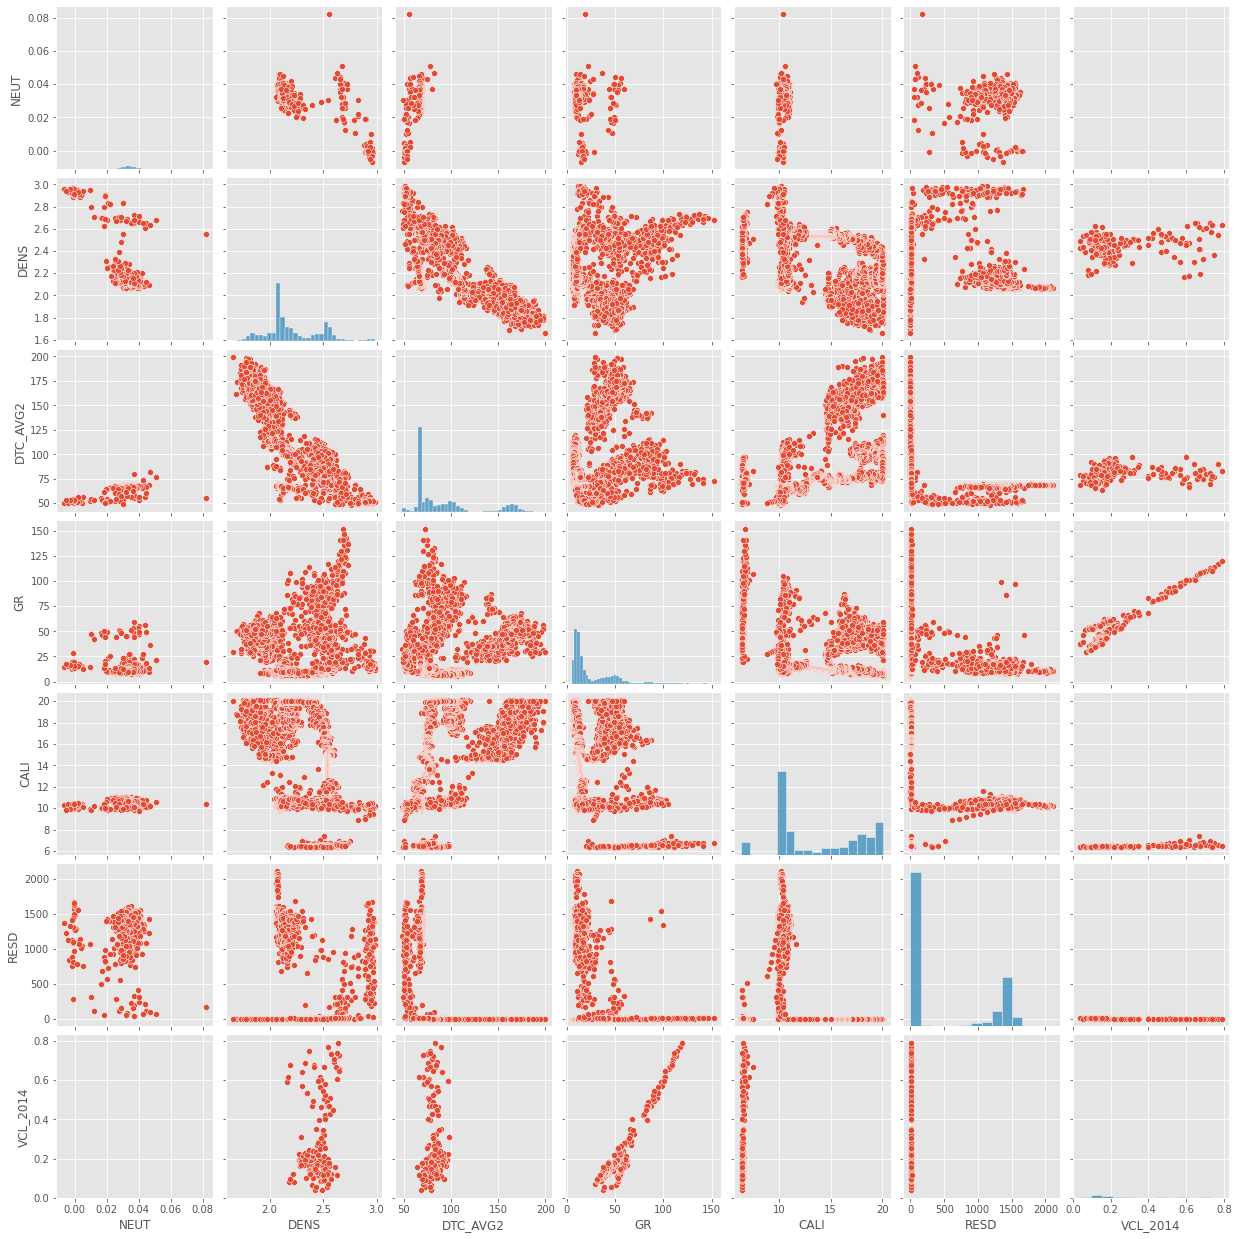

In [ ]:
#Relationships of all the variables to each other in a scatterplot matrix (SPLOM)
sns.pairplot(df, vars=['NEUT', 'DENS', 'DTC_AVG2', 'GR', 'CALI', 'RESD', 'VCL_2014'])
plt.show()